<a href="https://colab.research.google.com/github/Abdullah-NI/NoteBooks/blob/main/32_acuracy_score_and_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
heart_data=pd.read_csv('/content/drive/MyDrive/AllDataset/22 heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.shape

(1025, 14)

In [5]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [9]:
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [10]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [11]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [15]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [19]:
model=LogisticRegression(max_iter=10000)

In [20]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

model evalution

**accuracy score**

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(training_data_accuracy)

0.8585365853658536


In [23]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(test_data_accuracy)

0.8146341463414634


In [24]:
print('accuracy on test data ',round(test_data_accuracy*100,2),'%')

accuracy on test data  81.46 %


**confusion marix**

In [25]:
from sklearn.metrics import confusion_matrix

In [28]:
cf_matrix=confusion_matrix(y_test,x_test_prediction)

In [29]:
print(cf_matrix)

[[75 25]
 [13 92]]


In [31]:
tn,fp,fn,tp=cf_matrix.ravel()
print(tn,fp,fn,tp)

75 25 13 92


<Axes: >

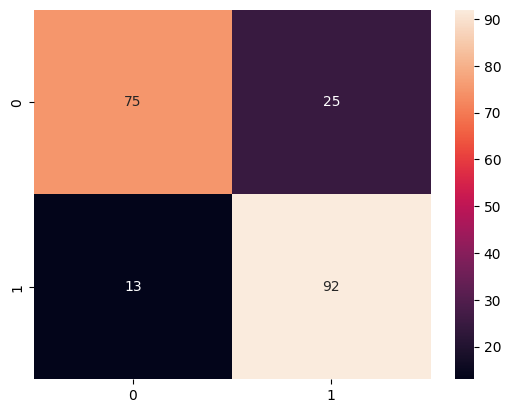

In [32]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True,)